<a href="https://colab.research.google.com/github/MoizAhmed2517/Classification_projects/blob/main/Penguin_Species_Classification_using_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penguin Species Prediction Using Random Forest

              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        39
   Chinstrap       1.00      0.89      0.94        27
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       103
   macro avg       0.98      0.96      0.97       103
weighted avg       0.97      0.97      0.97       103

[3.72822259e-01 1.03207146e-01 2.56225040e-01 1.71716696e-01
 8.61431032e-02 9.57002121e-03 3.15734217e-04]


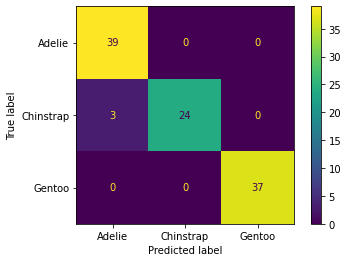

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

df = pd.read_csv('penguins_size_clean_data.csv')

X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

RFC_1 = RandomForestClassifier(n_estimators=10, max_features='sqrt', criterion='gini', bootstrap=True, random_state=101)
RFC_1.fit(X_train, y_train)
y_preds = RFC_1.predict(X_test)

print(classification_report(y_test, y_preds))
cm = confusion_matrix(y_test, y_preds, labels=RFC_1.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=RFC_1.classes_)
print(RFC_1.feature_importances_)
disp.plot()
plt.show()